In [6]:
from scipy.io import loadmat
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from operator import itemgetter
#%matplotlib notebook

Problem1Data = loadmat("dataset.mat")
# print(json.dumps(Problem1Data, indent=3))
X_Data = Problem1Data['X'].tolist()
Y_Data1 = Problem1Data['Y'].tolist()
Y_Data = []
for values in Y_Data1:
    Y_Data.append(values[0])
#print(Y_Data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size = 0.5, random_state = 9)

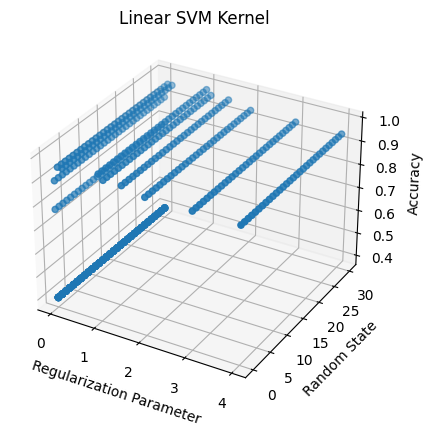

Hyper-parameters for highest accuracy
{
   "Regularization_Parameter": 1.0,
   "Random_State": 0,
   "Accuracy": 0.98
}


In [7]:
Regularization_Parameters = [1E-10, 2E-10, 1E-9, 2E-9, 1E-8, 2E-8, 1E-7, 2E-7, 1E-6, 2E-6, 1E-5, 2E-5, 1E-4, 2E-4, 1E-3, 2E-3, 1E-2, 2E-2, 1E-1, 2E-1, 1.0, 1.1, 1.5, 2.0, 3.0, 4.0]
Value_List = []

for C_Values in Regularization_Parameters:
    for Random_State in range (0, 31):
        TempDir = {}
        TempDir['Regularization_Parameter'] = C_Values
        TempDir['Random_State'] = Random_State
        sc = StandardScaler()
        X_Train = sc.fit_transform(X_Train)
        X_Test = sc.transform(X_Test)
        classifier = SVC(kernel = 'linear', random_state = Random_State, C=C_Values)
        classifier.fit(X_Train, Y_Train)
        Y_Pred = classifier.predict(X_Test)
        cm = confusion_matrix(Y_Test, Y_Pred)
        TempDir['Accuracy'] = accuracy_score(Y_Test,Y_Pred)
        Value_List.append(TempDir)

df = pd.DataFrame(Value_List)

threedee = plt.figure().add_subplot(projection='3d')
threedee.scatter3D(df['Regularization_Parameter'], df['Random_State'], df['Accuracy'])
threedee.set_xlabel('Regularization Parameter')
threedee.set_ylabel('Random State')
threedee.set_zlabel('Accuracy')
plt.title('Linear SVM Kernel')
plt.show()

Value_List = sorted(Value_List, key=itemgetter('Accuracy'), reverse=True)
print("Hyper-parameters for highest accuracy")
print(json.dumps(Value_List[0], indent=3))

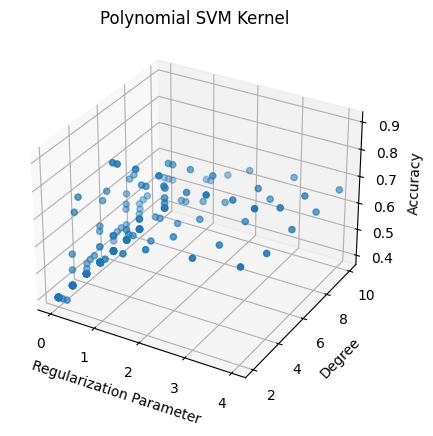

Hyper-parameters for highest accuracy
{
   "Regularization_Parameter": 1.0,
   "Degree": 3,
   "Accuracy": 0.9
}


In [8]:
Regularization_Parameters = [1E-10, 2E-10, 1E-9, 2E-9, 1E-8, 2E-8, 1E-7, 2E-7, 1E-6, 2E-6, 1E-5, 2E-5, 1E-4, 2E-4, 1E-3, 2E-3, 1E-2, 2E-2, 1E-1, 2E-1, 1.0, 1.1, 1.5, 2.0, 3.0, 4.0]
Dimension = [2,3,4,5,6,7,8,10]
Value_List = []

for C_Values in Regularization_Parameters:
    for Degree in Dimension:
        TempDir = {}
        TempDir['Regularization_Parameter'] = C_Values
        TempDir['Degree'] = Degree
        sc = StandardScaler()
        X_Train = sc.fit_transform(X_Train)
        X_Test = sc.transform(X_Test)
        classifier = SVC(kernel = 'poly', random_state = 0, degree=Degree, C=C_Values)
        classifier.fit(X_Train, Y_Train)
        Y_Pred = classifier.predict(X_Test)
        cm = confusion_matrix(Y_Test, Y_Pred)
        TempDir['Accuracy'] = accuracy_score(Y_Test,Y_Pred)
        Value_List.append(TempDir)

df = pd.DataFrame(Value_List)

threedee = plt.figure().add_subplot(projection='3d')
threedee.scatter3D(df['Regularization_Parameter'], df['Degree'], df['Accuracy'])
threedee.set_xlabel('Regularization Parameter')
threedee.set_ylabel('Degree')
threedee.set_zlabel('Accuracy')
plt.title('Polynomial SVM Kernel')
plt.show()

Value_List = sorted(Value_List, key=itemgetter('Accuracy'), reverse=True)
print("Hyper-parameters for highest accuracy")
print(json.dumps(Value_List[0], indent=3))

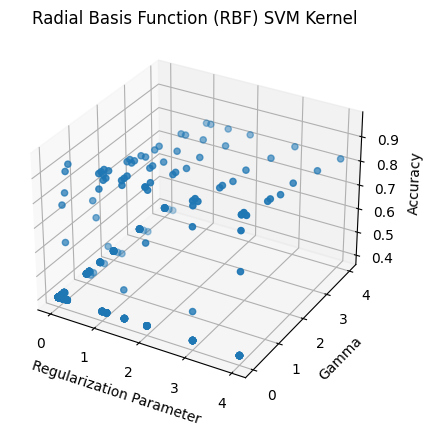

Hyper-parameters for highest accuracy
{
   "Regularization_Parameter": 1.0,
   "Gamma": 0.02,
   "Accuracy": 0.96
}


In [5]:
Regularization_Parameters = [1E-10, 2E-10, 1E-9, 2E-9, 1E-8, 2E-8, 1E-7, 2E-7, 1E-6, 2E-6, 1E-5, 2E-5, 1E-4, 2E-4, 1E-3, 2E-3, 1E-2, 2E-2, 1E-1, 2E-1, 1.0, 1.1, 1.5, 2.0, 3.0, 4.0]
Gamma = [1E-10, 2E-10, 1E-9, 2E-9, 1E-8, 2E-8, 1E-7, 2E-7, 1E-6, 2E-6, 1E-5, 2E-5, 1E-4, 2E-4, 1E-3, 2E-3, 1E-2, 2E-2, 1E-1, 2E-1, 1.0, 1.1, 1.5, 2.0, 3.0, 4.0]
Value_List = []

for C_Values in Regularization_Parameters:
    for Gamma_Values in Gamma:
        TempDir = {}
        TempDir['Regularization_Parameter'] = C_Values
        TempDir['Gamma'] = Gamma_Values
        sc = StandardScaler()
        X_Train = sc.fit_transform(X_Train)
        X_Test = sc.transform(X_Test)
        classifier = SVC(kernel = 'rbf', random_state = 0, gamma=Gamma_Values, C=C_Values)
        classifier.fit(X_Train, Y_Train)
        Y_Pred = classifier.predict(X_Test)
        cm = confusion_matrix(Y_Test, Y_Pred)
        TempDir['Accuracy'] = accuracy_score(Y_Test,Y_Pred)
        Value_List.append(TempDir)

df = pd.DataFrame(Value_List)

threedee = plt.figure().add_subplot(projection='3d')
threedee.scatter3D(df['Regularization_Parameter'], df['Gamma'], df['Accuracy'])
threedee.set_xlabel('Regularization Parameter')
threedee.set_ylabel('Gamma')
threedee.set_zlabel('Accuracy')
plt.title('Radial Basis Function (RBF) SVM Kernel')
plt.show()

Value_List = sorted(Value_List, key=itemgetter('Accuracy'), reverse=True)
print("Hyper-parameters for highest accuracy")
print(json.dumps(Value_List[0], indent=3))